## load dataset


In [4]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
mat = scipy.io.loadmat('input/subcircuit4_data.mat')
AHL_list = mat['ahlconc']
ATC_list = mat['atcconc']
AHL_list

array([[1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03]])

In [5]:
for i in mat.keys():
    print(i)

__header__
__version__
__globals__
ahlconc
atcconc
fc_gfp_avg
fc_gfp_sem
fc_gfp_ts
fc_gfp_ts_avg
fc_gfp_ts_sem
fc_rfp_avg
fc_rfp_sem
fc_rfp_ts
fc_rfp_ts_avg
fc_rfp_ts_sem
time


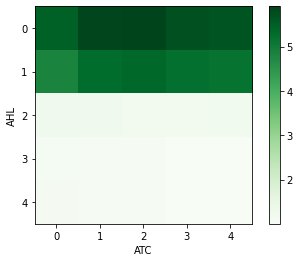

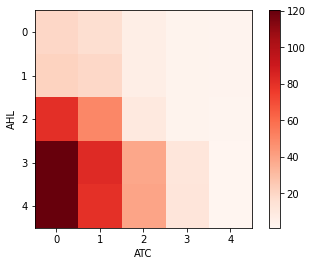

In [6]:
plt.imshow(mat['fc_gfp_avg'],cmap='Greens')
plt.colorbar()
plt.ylabel('AHL')
plt.xlabel('ATC')
plt.show()

plt.imshow(mat['fc_rfp_avg'],cmap='Reds')
plt.colorbar()
plt.ylabel('AHL')
plt.xlabel('ATC')
plt.show()
#vertical corresponds to AHL list - rows ATC
#horizontal corresponds to ATC list columns AHL



In [12]:
maxATC_doseResponse_gfp = mat['fc_gfp_avg'][:,0]
maxATC_doseResponse_rfp = mat['fc_rfp_avg'][:,0]

maxATC_doseResponse_gfp_sem = mat['fc_gfp_sem'][:,0]
maxATC_doseResponse_rfp_sem = mat['fc_rfp_sem'][:,0]

array([0.52599883, 0.40810658, 0.01980029, 0.00104578, 0.00122158])

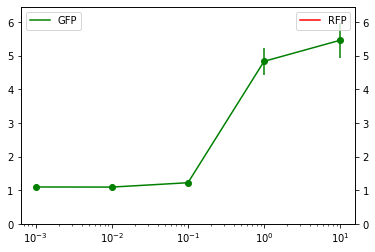

In [18]:
fig,ax = plt.subplots()
ax.plot(AHL_list[0],maxATC_doseResponse_gfp,label='GFP', c='green')
ax.errorbar(AHL_list[0],maxATC_doseResponse_gfp,yerr=maxATC_doseResponse_gfp_sem,c='green',fmt='o')
ax.set_ylim(0, np.amax(maxATC_doseResponse_gfp)+1)
ax.legend(loc=2) #upper left
ax.ticklabel_format(useOffset=False)

ax2=ax.twinx()
ax2.plot(AHL_list[0],maxATC_doseResponse_rfp,label='RFP', c='red')
ax.errorbar(AHL_list[0],maxATC_doseResponse_rfp,yerr=maxATC_doseResponse_rfp_sem,c='red',fmt='o')

ax2.set_ylim(0, np.amax(maxATC_doseResponse_gfp) + 1)
ax2.legend(loc=1) #upper right

ax.ticklabel_format(useOffset=False)
ax.set_xscale('log')
plt.show()

In [ ]:
translated_maxATC_doseResponse_gfp = maxATC_doseResponse_gfp/np.amin(maxATC_doseResponse_gfp)
translated_maxATC_doseResponse_rfp = maxATC_doseResponse_rfp/np.amin(maxATC_doseResponse_rfp)

In [21]:
import pickle as pkl 
subcircuit1_circuit14_doseResponse_maxATC = {}
subcircuit1_circuit14_doseResponse_maxATC['AHL_list'] = AHL_list[0]
subcircuit1_circuit14_doseResponse_maxATC['maxATC_doseResponse_gfp'] = maxATC_doseResponse_gfp
subcircuit1_circuit14_doseResponse_maxATC['maxATC_doseResponse_rfp'] = maxATC_doseResponse_rfp
subcircuit1_circuit14_doseResponse_maxATC['maxATC_doseResponse_gfp_sem'] = maxATC_doseResponse_gfp_sem
subcircuit1_circuit14_doseResponse_maxATC['maxATC_doseResponse_rfp_sem'] = maxATC_doseResponse_rfp_sem
pkl.dump(subcircuit1_circuit14_doseResponse_maxATC, open('input/subcircuit1_circuit14_doseResponse_maxATC.pkl', 'wb'))

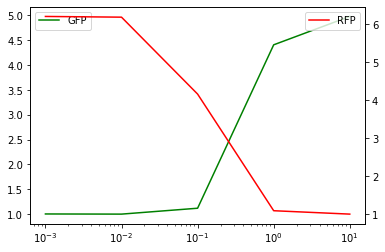

In [ ]:
fig,ax = plt.subplots()
ax.plot(AHL_list[0],translated_maxATC_doseResponse_gfp,label='GFP', c='green')
# ax.set_ylim(np.amin(U[0])-pad, np.amax(U[0])+pad)
ax.legend(loc=2) #upper left
ax.ticklabel_format(useOffset=False)

ax2=ax.twinx()
ax2.plot(AHL_list[0],translated_maxATC_doseResponse_rfp,label='RFP', c='red')
# ax2.set_ylim(np.amin(U[1])-pad, np.amax(U[1])+pad)
ax2.legend(loc=1) #upper right

ax.ticklabel_format(useOffset=False)
ax.set_xscale('log')
plt.show()
